In [29]:
# Author: Sathish Manthani
# Date: 7/20/2020
# Course: DSC640 - Data visualization

In [30]:
# The task is to visualization the data using heat maps, spatial charts, and contour charts

In [69]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data import

In [70]:
costco_df = pd.read_csv('data/costcos-geocoded.csv')
ppg_df = pd.read_csv('data/ppg2008.csv')

costco_df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [71]:
flights_df.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [72]:

df_flights = sns.load_dataset('flights')
flights_pivot = df_flights.pivot('month', 'year', 'passengers')
#flights_pivot = pd.pivot_table(data=df_flights, index='year', values='passengers', aggfunc='sum')

## Heat Map

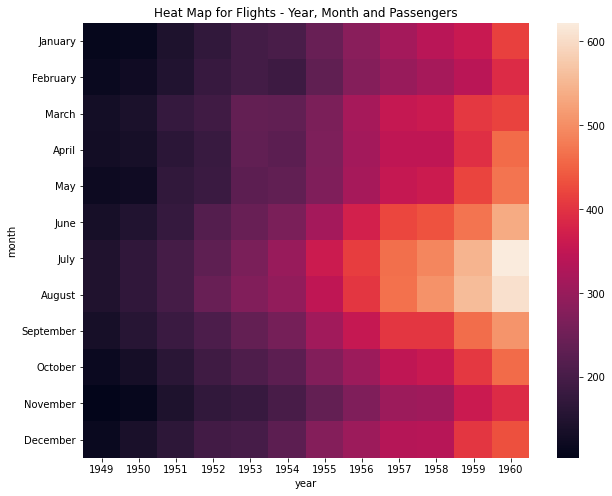

In [73]:
## Heat map code
ax, fig = plt.subplots(figsize=(10,8))
sns.heatmap(flights_pivot)
plt.title('Heat Map for Flights - Year, Month and Passengers')
plt.show()

## Spatial chart

In [79]:
Boundaries = ((costco_df.Longitude.min(), costco_df.Longitude.max(),      
         costco_df.Latitude.min(), costco_df.Latitude.max()))

In [80]:
Boundaries

(-159.3799149, -71.066458, 19.687344, 61.210815000000004)

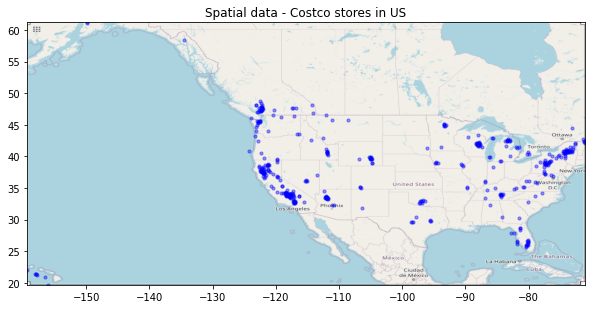

In [85]:
ruh_m = plt.imread('data/map4.png')

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(costco_df.Longitude, costco_df.Latitude, zorder=1, alpha= 0.4, c='b', s=10)
ax.set_title('Spatial data - Costco stores in US')
ax.set_xlim(Boundaries[0],Boundaries[1])
ax.set_ylim(Boundaries[2],Boundaries[3])
ax.imshow(ruh_m, zorder=0, extent = Boundaries, aspect= 'equal')


## Contour Plot

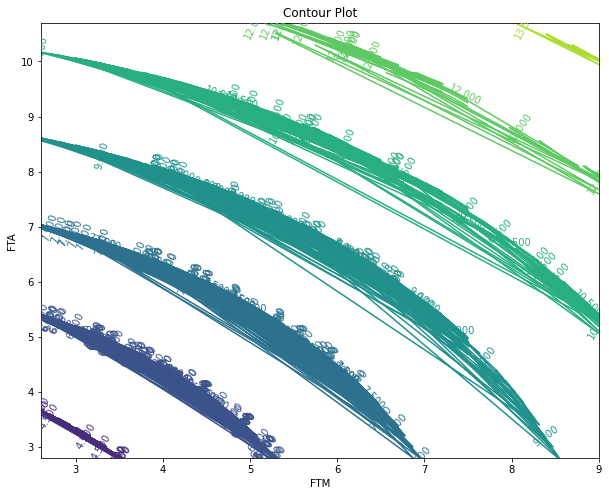

In [86]:

%matplotlib inline


def squareroot(x, y):
    """
        square root of sum of square of x and y
    """
    return np.sqrt(x**2 + y**2)

x = np.array(ppg_df['FTM'])
y = np.array(ppg_df['FTA'])

X, Y = np.meshgrid(x, y)
Z = squareroot(X, Y)

fig, ax = plt.subplots(figsize = (10,8))

#plt.figure()
cp = plt.contour(X, Y, Z)
plt.clabel(cp, inline=True,fontsize=10)
plt.title('Contour Plot')
plt.xlabel('FTM')
plt.ylabel('FTA')
plt.show()